<a href="https://colab.research.google.com/github/MichaelSchmidt1729/EDA/blob/main/let_s_discover_more_about_the_olympic_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Tabular Data - Example Notebook

We are using dataset available on Kaggle by the name "120 years of Olympic history: athletes and results" .This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The authors have scraped this data from www.sports-reference.com in May 2018. The R code they used to scrape and wrangle the data is on GitHub and I recommend to check their [kaggle kernel](https://www.kaggle.com/code/heesoo37/olympic-history-data-a-thorough-analysis/report).

The dataset can be found at this [link]()

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events).


# Import the required libraries

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.graphics.gofplots as sm
from sklearn.preprocessing import PowerTransformer
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')

<Figure size 2000x1000 with 0 Axes>

# Load the data

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
data = pd.read_csv('/content/drive/MyDrive/datasets/athlete_events.csv')
regions = pd.read_csv('/content/drive/MyDrive/datasets/noc_regions.csv')

# Inspecting various attributes of imported data

Here we are basically just trying to get hang of our dataset before starting a more in depth analysis. If you can recall from the article, we are also computing the Descriptive statistics for the dataset.

In [121]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [122]:
#Check for Nan Values and deal with them
for col in data.columns:
    num_nan = data[col].isna().sum()
    pct_nan = (num_nan / len(data)) * 100
    print(f"Column {col} has {num_nan} NaN values ({pct_nan:.2f}%).")

Column ID has 0 NaN values (0.00%).
Column Name has 0 NaN values (0.00%).
Column Sex has 0 NaN values (0.00%).
Column Age has 9474 NaN values (3.49%).
Column Height has 60171 NaN values (22.19%).
Column Weight has 62875 NaN values (23.19%).
Column Team has 0 NaN values (0.00%).
Column NOC has 0 NaN values (0.00%).
Column Games has 0 NaN values (0.00%).
Column Year has 0 NaN values (0.00%).
Column Season has 0 NaN values (0.00%).
Column City has 0 NaN values (0.00%).
Column Sport has 0 NaN values (0.00%).
Column Event has 0 NaN values (0.00%).
Column Medal has 231333 NaN values (85.33%).


We found out that the data is missing height and weight for a good proportion of participants. We can use various techniques such as interpolation, forward or backward fill, use Machine Learning to predict the missing information, or set a fixed value to fill the missiing values, but for the sake of simplicity we will just drop these rows.Note that how we deal with Nan values impact the results, so generally we experiment till we get our desired results. For example you might see slight differences between some plots in notebook and in the article, this is because those plots are generated using data where Nan Values were not dropped.
Also in case of medals column, it is safe to assume that Nan specifies that no medal was won

In [123]:
data.dropna(subset=['Height','Weight','Age'], inplace=True)
# data['Height'].fillna(data['Height'].mean(), inplace=True)
# data['Weight'].fillna(data['Weight'].mean(), inplace=True)
# data['Age'].fillna(data['Age'].mean(), inplace=True)


In [124]:
data.skew()

<ipython-input-124-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


ID       -0.015114
Age       1.139644
Height    0.016901
Weight    0.792183
Year     -0.961373
dtype: float64

Age heavily right skewed -> some older athletes as outliers (see median below).
Weight moderately left skewed -> outliers of high weight.

In [125]:
data.describe()

,ID,Age,Height,Weight,Year
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,68616.017675,25.055509,175.371950,70.688337,1989.674678
std,38996.514355,5.483096,10.546088,14.340338,20.130865
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


WTF? Youngest athlete was 11. years old? min. weight is 25 kg? Edit: From North Korea, Gymnast.

In 1896 there was a 10-year old Russian athlete. Dropped because: data.dropna(subset=['Height','Weight','Age'], inplace=True)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      206165 non-null  int64  
 1   Name    206165 non-null  object 
 2   Sex     206165 non-null  object 
 3   Age     206165 non-null  float64
 4   Height  206165 non-null  float64
 5   Weight  206165 non-null  float64
 6   Team    206165 non-null  object 
 7   NOC     206165 non-null  object 
 8   Games   206165 non-null  object 
 9   Year    206165 non-null  int64  
 10  Season  206165 non-null  object 
 11  City    206165 non-null  object 
 12  Sport   206165 non-null  object 
 13  Event   206165 non-null  object 
 14  Medal   30181 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 25.2+ MB


In [127]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [128]:
for col in regions.columns:
    print(f"Column {col} has {regions[col].isna().sum()} NaN values.")

Column NOC has 0 NaN values.
Column region has 3 NaN values.
Column notes has 209 NaN values.


# 4. Joining the dataframes

Using the 'Merge' function from Pandas, we have the ability to combine the two dataframes by using the 'NOC' column as the key

In [129]:
merged = pd.merge(data, regions, on='NOC', how='left')

Let's see the result:

In [130]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Graphical techniques


## Histogram

<Axes: >

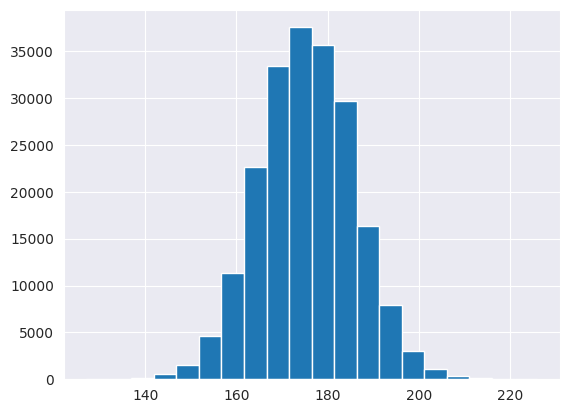

In [131]:
merged.Height.hist(bins=20)

## Normal Probability Plot

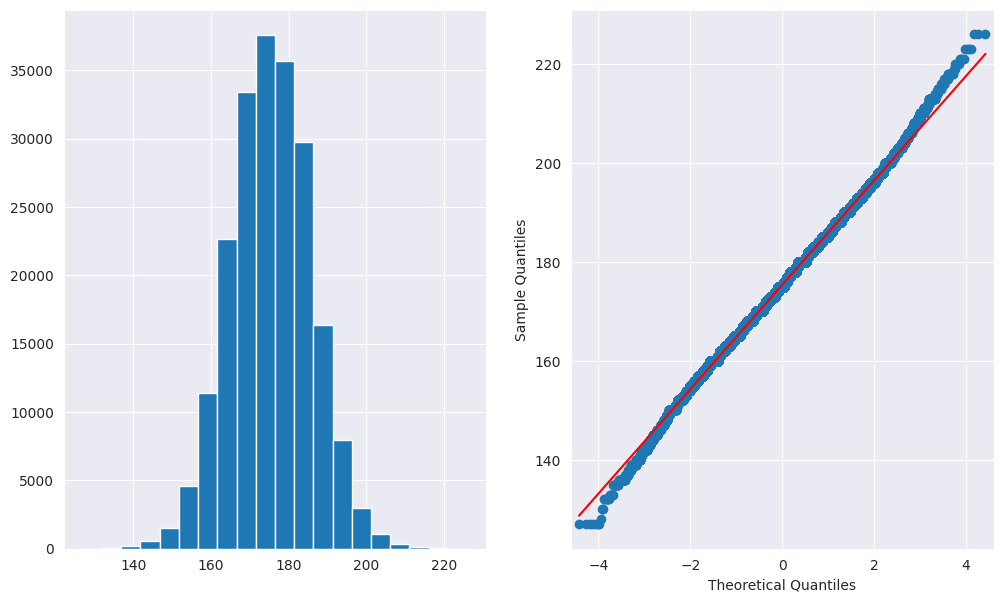

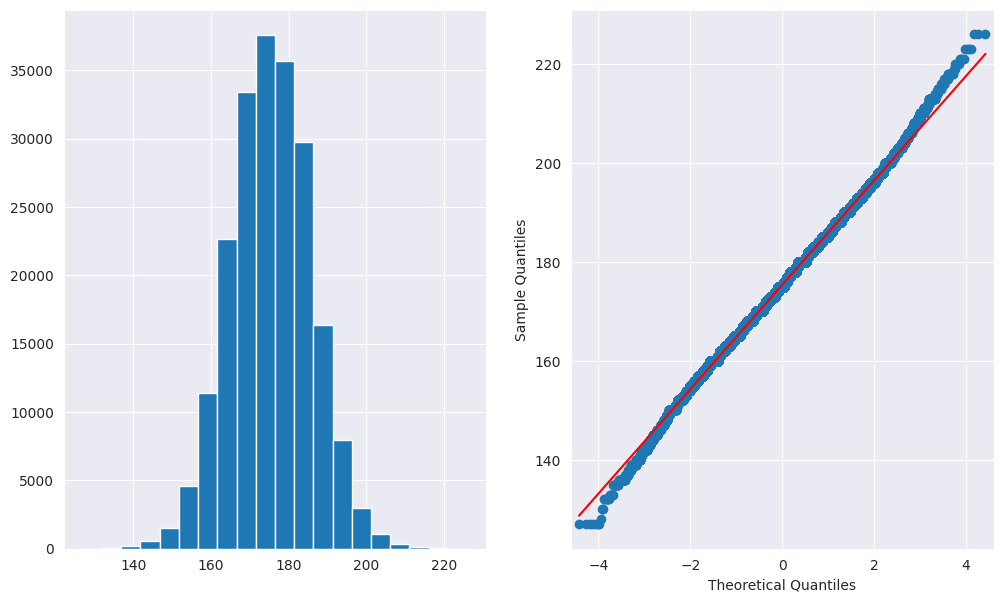

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
merged.Height.hist(bins=20,ax=ax[0])
sm.ProbPlot(merged.Height).qqplot(line='s', ax=ax[1])


## Kernel Distribution Estimation or KDE plot

<ipython-input-133-adaa94821aef>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=goldMedalsBasketball["Height"],shade=True,label="Basketball")
<ipython-input-133-adaa94821aef>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=goldMedalsSwimming["Height"],shade=True,label="Swimming")


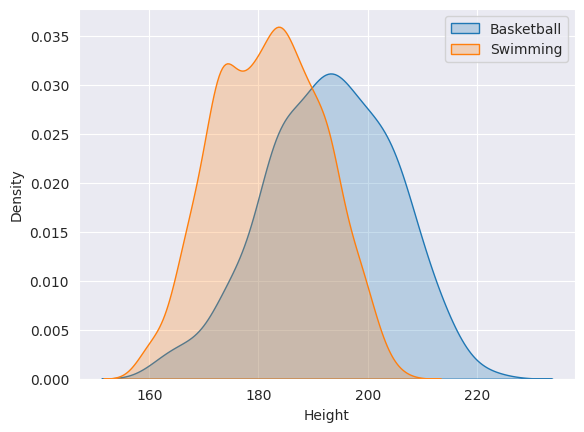

In [133]:
goldMedalsBasketball = merged[(merged.Medal == 'Gold')&(merged.Sport == 'Basketball')]
goldMedalsSwimming = merged[(merged.Medal == 'Gold')&(merged.Sport == 'Swimming')]
sns.kdeplot(data=goldMedalsBasketball["Height"],shade=True,label="Basketball")
sns.kdeplot(data=goldMedalsSwimming["Height"],shade=True,label="Swimming")

# Displaying the legend
plt.legend()

## Pie chart

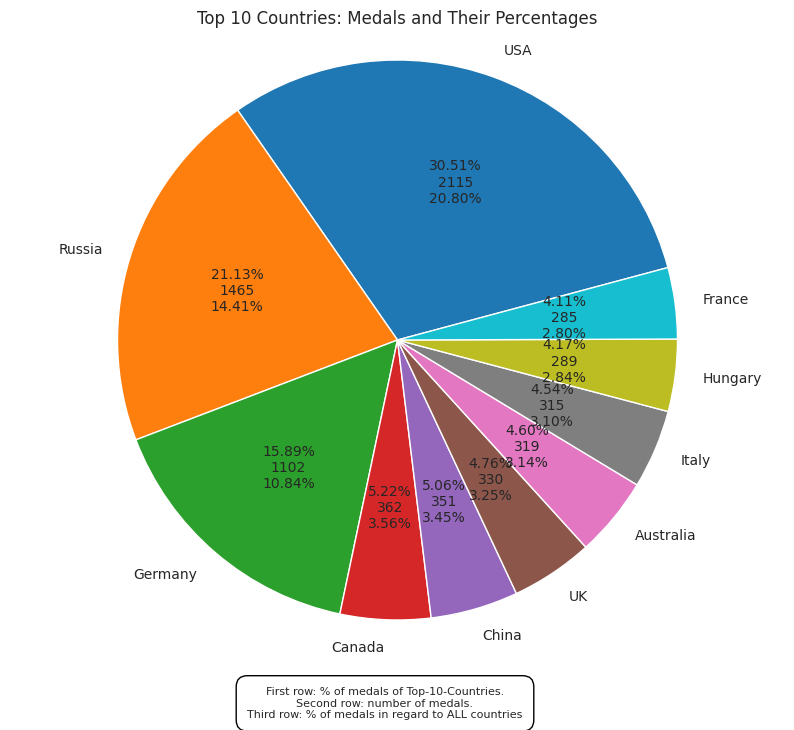

In [134]:
goldMedals = merged[(merged.Medal == 'Gold')]
totalGoldMedals=goldMedals.region.value_counts().reset_index(name='Medal')

sorted_data = totalGoldMedals.sort_values('Medal', ascending=False).head(10)
values = sorted_data['Medal']
labels = sorted_data.index

# Assuming totalGoldMedals DataFrame is already defined and contains 'Medal' column
totalGoldMedals = totalGoldMedals.set_index('index')

# Sorting the DataFrame by the 'Medal' column in descending order
sorted_data = totalGoldMedals.sort_values('Medal', ascending=False)

# Extracting values and labels for the top 10
values_top10 = sorted_data['Medal'].head(10)
labels_top10 = sorted_data.index[:10]

# Extracting total medals for percentage calculation of all countries
total_medals_all = sorted_data['Medal'].sum()

# Custom autopct to show percentage of medals of top-10 countries and percentage of medals in regard to ALL countries
def custom_autopct(pct):
    total_top10 = sum(values_top10)
    val = int(round(pct*total_top10/100.0))
    percentage_of_all = (val / total_medals_all) * 100
    return f"{pct:.2f}%\n{val}\n{percentage_of_all:.2f}%"

# Creating the pie chart for top 10
plt.figure(figsize=(10, 8))
plt.pie(values_top10, labels=labels_top10, startangle=15, autopct=custom_autopct)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Top 10 Countries: Medals and Their Percentages')

# Adding text box
explanation_text = 'First row: % of medals of Top-10-Countries.\nSecond row: number of medals.\nThird row: % of medals in regard to ALL countries'
plt.gcf().text(0.5, 0.02, explanation_text, ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

plt.show()

## Bar chart

In [135]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to plot medals
def plot_medals(n_countries):
    clear_output(wait=True)
    display(slider)  # Redisplay the slider
    print("Move the slider to change the number of countries.")  # Instruction text

    data = totalGoldMedals.head(n_countries)
    plt.figure(figsize=(20, 10))
    bars = plt.bar(data['index'], data['Medal'])

    total_medals = data['Medal'].sum()

    for bar in bars:
        height = bar.get_height()
        percentage = f"{(height / total_medals) * 100:.1f}%"
        plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2, f"{height:,}".replace(",", ".") + f"\n{percentage}", ha='center', va='center')
    # Explanation text for annotations
    plt.text(1, max(data['Medal']) * 0.9, 'First row: Absolute number of medals\nSecond row: % of medals to displayed countries', fontsize=10, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

    plt.xlabel('Country')
    plt.ylabel('Gold Medals')
    plt.xticks(rotation=45)
    plt.title('Gold Medals Count by Country')
    plt.show()

# Slider widget
slider = widgets.IntSlider(
    value=10,
    min=1,
    max=20,
    step=1,
    description='Number of Countries:',
    continuous_update=False
)

# Update plot function
def update_plot(change):
    plot_medals(change.new)

slider.observe(update_plot, names='value')

# Initial display
plot_medals(slider.value)

IntSlider(value=10, continuous_update=False, description='Number of Countries:', max=20, min=1)

Move the slider to change the number of countries.


KeyError: 'index'

<Figure size 2000x1000 with 0 Axes>

In [139]:
import ipywidgets as widgets
from IPython.display import display

# Assuming totalGoldMedals is your DataFrame sorted by medals

def plot_medals(n_countries):
    # Sort if needed: totalGoldMedals.sort_values('Medal', ascending=False, inplace=True)
    data = totalGoldMedals.head(n_countries)
    plt.figure(figsize=(20, 10))
    bars = plt.bar(data['index'], data['Medal'])

    total_medals = data['Medal'].sum()

    for bar in bars:
        height = bar.get_height()
        percentage = f"{(height / total_medals) * 100:.1f}%"
        plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2, f'{height}\n{percentage}', ha='center', va='bottom')

    plt.xlabel('Country')
    plt.ylabel('Gold Medals')
    plt.xticks(rotation=45)
    plt.show()

# Create a slider widget
slider = widgets.IntSlider(
    value=10,
    min=1,
    max=20,
    step=1,
    description='Number of Countries:',
    continuous_update=False
)

# Create a function to update the plot
def update_plot(change):
    plot_medals(change.new)

slider.observe(update_plot, names='value')

# Initial plot
plot_medals(slider.value)

# Display the slider
display(slider)

KeyError: 'index'

<Figure size 2000x1000 with 0 Axes>

## Stacked bar chart

In [137]:
SilverMedals = merged[(merged.Medal == 'Silver')]
bronzeMedals = merged[(merged.Medal == 'Bronze')]
goldMedals = merged[(merged.Medal == 'Gold')]
s=SilverMedals.region.value_counts().reset_index(name='Silver')
b=bronzeMedals.region.value_counts().reset_index(name='Bronze')
g=goldMedals.region.value_counts().reset_index(name='Gold')
medal_data=pd.merge(g,pd.merge(s,b)).head(20)

IntSlider(value=20, continuous_update=False, description='Number of Countries:', max=20, min=1)

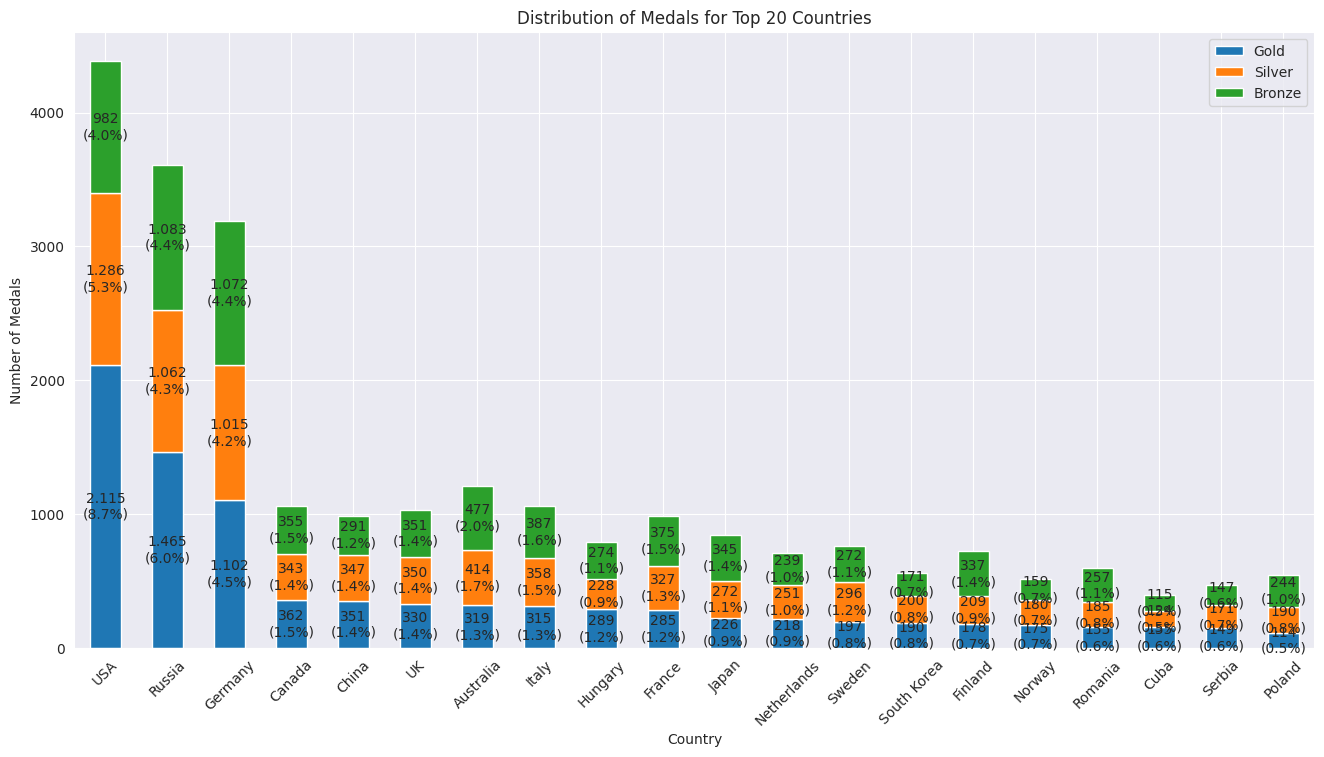

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming medal_data DataFrame is already prepared
# Example creation for context
# medal_data = pd.merge(g, pd.merge(s, b)).head(20)

def plot_medals(num_countries):
    clear_output(wait=True)
    display(slider)

    data = medal_data.head(num_countries)
    fig, ax = plt.subplots(figsize=(16, 8))
    data.plot(x='index', kind='bar', stacked=True, title=f'Distribution of Medals for Top {num_countries} Countries', ax=ax)

    total_medals = data[['Gold', 'Silver', 'Bronze']].sum().sum()

    for i, row in data.iterrows():
        cum_height = 0
        for medal_type in ['Gold', 'Silver', 'Bronze']:
            value = row[medal_type]
            if value > 0:
                # Formatting the number with a dot as the thousand separator
                formatted_value = f"{value:,}".replace(",", ".")
                percentage = (value / total_medals) * 100
                # Annotation for absolute value and percentage
                ax.text(i, cum_height + value / 2, f"{formatted_value}\n({percentage:.1f}%)", ha='center', va='center')
                cum_height += value

    plt.xticks(rotation=45)
    plt.ylabel('Number of Medals')
    plt.xlabel('Country')
    plt.show()

slider = widgets.IntSlider(
    value=20,  # Initial number of countries
    min=1,  # Minimum number of countries
    max=len(medal_data),  # Maximum number of countries
    step=1,  # Step size
    description='Number of Countries:',
    continuous_update=False
)

def on_slider_change(change):
    plot_medals(change.new)

slider.observe(on_slider_change, names='value')

display(slider)
plot_medals(slider.value)


## Line chart

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming womenInOlympics DataFrame is already defined
womencount = womenInOlympics.groupby('Year')['Name'].count()

# Correct usage of sns.lineplot()
sns.lineplot(x=womencount.index, y=womencount.values)
plt.title('Number of Woman Athletes per Edition of the Games')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')

plt.show()

## Run Sequence plot

In [ ]:
figure(figsize=(8, 6), dpi=80)
merged.Height.plot()

## Area plot

In [ ]:
womenGold = merged[(merged.Sex == 'F') & (merged.Medal == 'Gold')& (merged.Season == 'Summer')]
menGold = merged[(merged.Sex == 'M') & (merged.Medal == 'Gold')& (merged.Season == 'Summer')]
womencount=womenGold.groupby(womenGold.Year).count()
mencount=menGold.groupby(menGold.Year).count()
x=pd.DataFrame(womencount.ID)
x=x.rename(columns={"ID": "Women"})
y=pd.DataFrame(mencount.ID)
y=y.rename(columns={"ID": "Men"})
NumberOfGold=x.join(y)


In [ ]:
NumberOfGold.plot.area(stacked=False,colors=['pink','steelblue'],figsize=(18, 8))
plt.title('Medals won by woman in comparison with men per edition of the Games')

## Box plot

In [ ]:
figure(figsize=(8, 6), dpi=80)
merged.boxplot(column=['Height', 'Weight', 'Age'])

## Scatter plot

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x='Height',y='Weight',data=merged)

In [ ]:
sns.scatterplot(x='Height',y='Weight',hue="Sex",data=merged)

## Lag plot


In [ ]:
#shuffle dataset
merged=merged.sample(frac=1)

In [ ]:
figure(figsize=(8, 6), dpi=80)
pd.plotting.lag_plot(merged.Weight,lag=1)

## Pair plot

In [ ]:
sns.pairplot(merged[['Age','Height','Weight']])

## Heatmap

In [ ]:
sns.heatmap(merged[['Age','Height','Weight']].corr(), cmap="YlGnBu", annot=True)

# More Questions

We can use these or more such tehniques to find  answers for questions such as
1. Which countries have most and least number of Women gold medalist.
2. Is there any country where number of women who won medals are more than medals won by men of same country.
3. Which Country do most tallest athletes come from?

and many more...


## Which country has most and least number of Women gold medalist.

In [ ]:
womenGold = merged[(merged.Sex == 'F') & (merged.Medal == 'Gold')]
womenGold=womenGold.region.value_counts().reset_index(name='Medal')

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='index',y="Medal",data=womenGold.head(20))
plt.title('Countries with most number of gold medalsits ')

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='index',y="Medal",data=womenGold.tail(20))
plt.title('Countries with least number of gold medalsits ')

Try out the rest...